In [273]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns

In [274]:
data_folder: Path = Path("./")
benchmark_speed_file: Path = data_folder / "benchmark_results.csv"
benchmark_compression_file: Path = data_folder / "bits_per_int.csv"
sns.set(rc={'figure.figsize':(30,16)})

## Preprocessing

In [275]:
benchmark_speeds: DataFrame = pd.read_csv(benchmark_speed_file)
benchmark_speeds = benchmark_speeds.loc[~benchmark_speeds["name"].str.contains("write_BitsPerInt")]
benchmark_speeds["input_data"] = [name.split("get_with_")[1] for name in benchmark_speeds["name"]]
benchmark_speeds["library"] = [name.split("/")[1].split("_benchmark")[0] for name in benchmark_speeds["name"]]
benchmark_speeds["process_type"] = [name.split("_benchmark_")[1].split("_get")[0] for name in benchmark_speeds["name"]]

# When we display all codecs, the plots get a bit full and messy. So we can filter them a bit
# and just display the codecs we want to see at the moment
filtered_fast_pfor_codecs: DataFrame = benchmark_speeds.loc[~(benchmark_speeds["library"].str.contains("fastPFOR"))]
only_fast_pfor: DataFrame = benchmark_speeds.loc[(benchmark_speeds["library"].str.contains("fastPFOR"))]
most_interesting_libraries: List[str] = ["turboPFOR_direct", "turboPFOR", "sdsl_lite_dac_vector", "fastPFOR_simdfastpfor128",
                                         "fastPFOR_simdbinarypacking", "maskedVByte"]
even_more_interesting_libraries = ["turboPFOR_direct", "turboPFOR", "fastPFOR_simdfastpfor128",
                                         "fastPFOR_simdbinarypacking"]
limited_to_interesting_libs: DataFrame = benchmark_speeds.loc[(benchmark_speeds["library"].isin(most_interesting_libraries))]
dataset_filtered: DataFrame = limited_to_interesting_libs

## Encoding

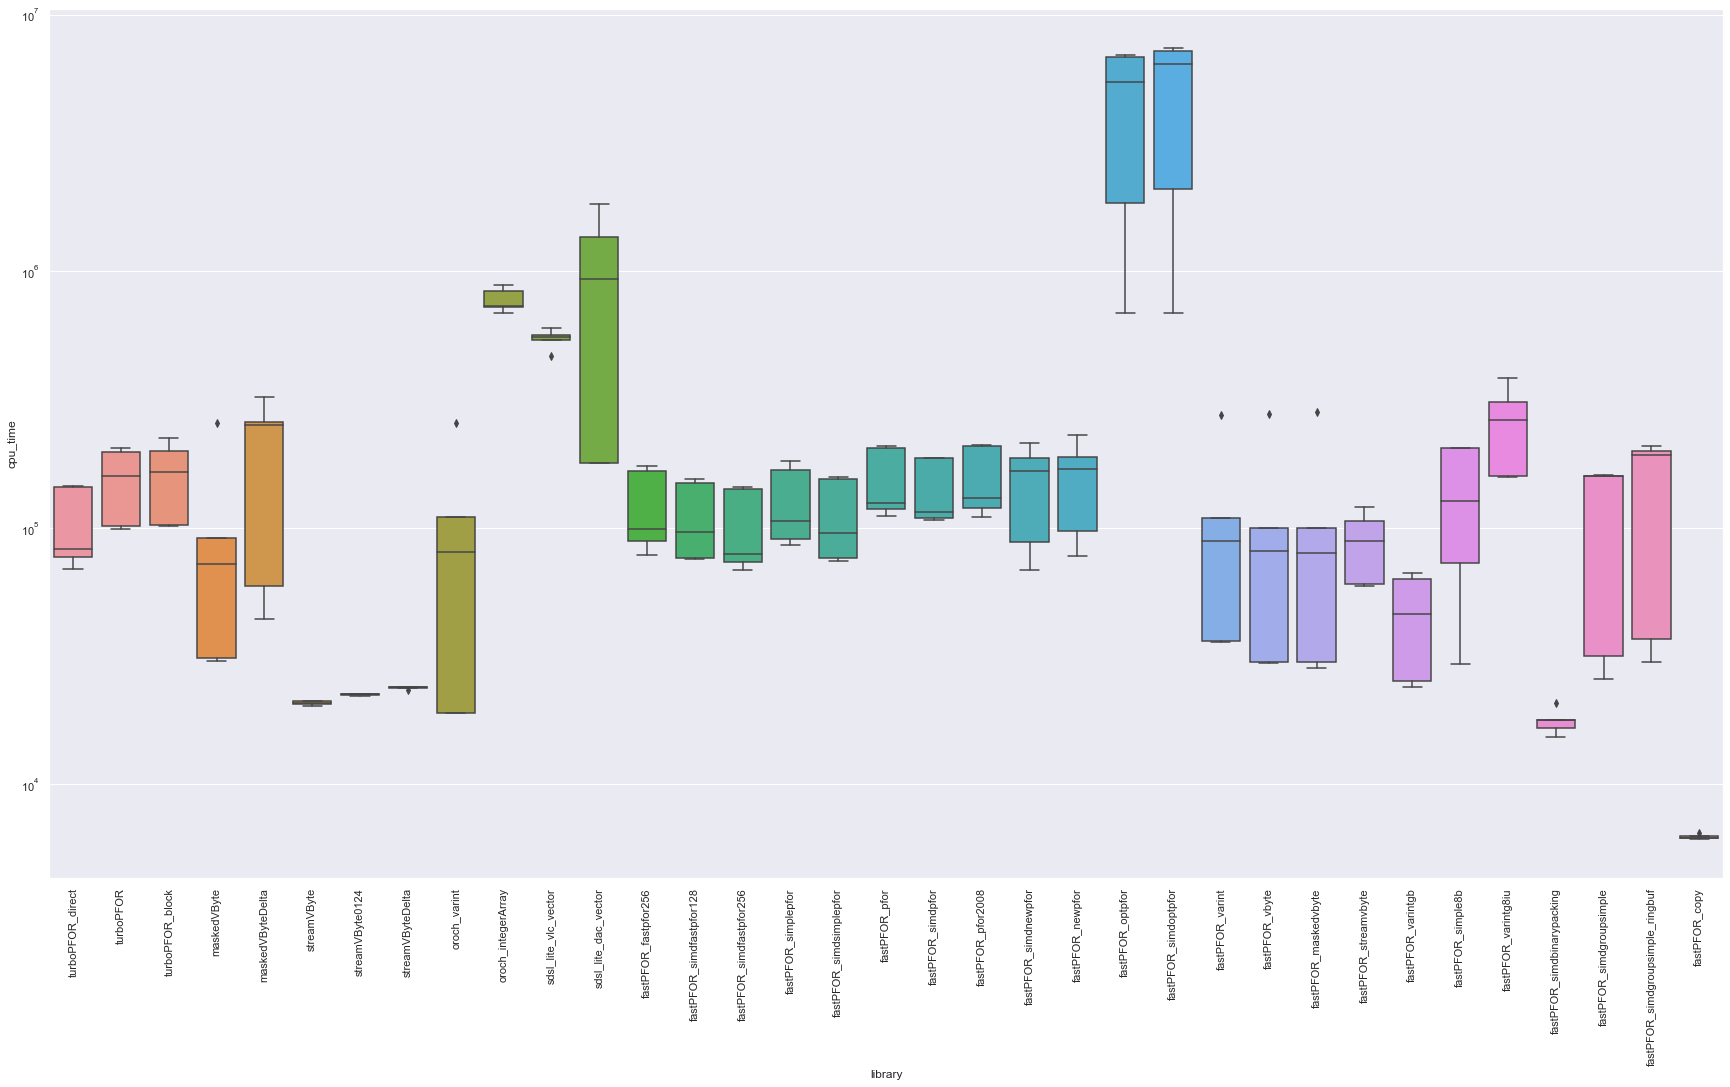

In [276]:
encoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "encoding"]
plot: sns.boxplot = sns.boxplot(data=encoding, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")

## Encoding (interesting libs)

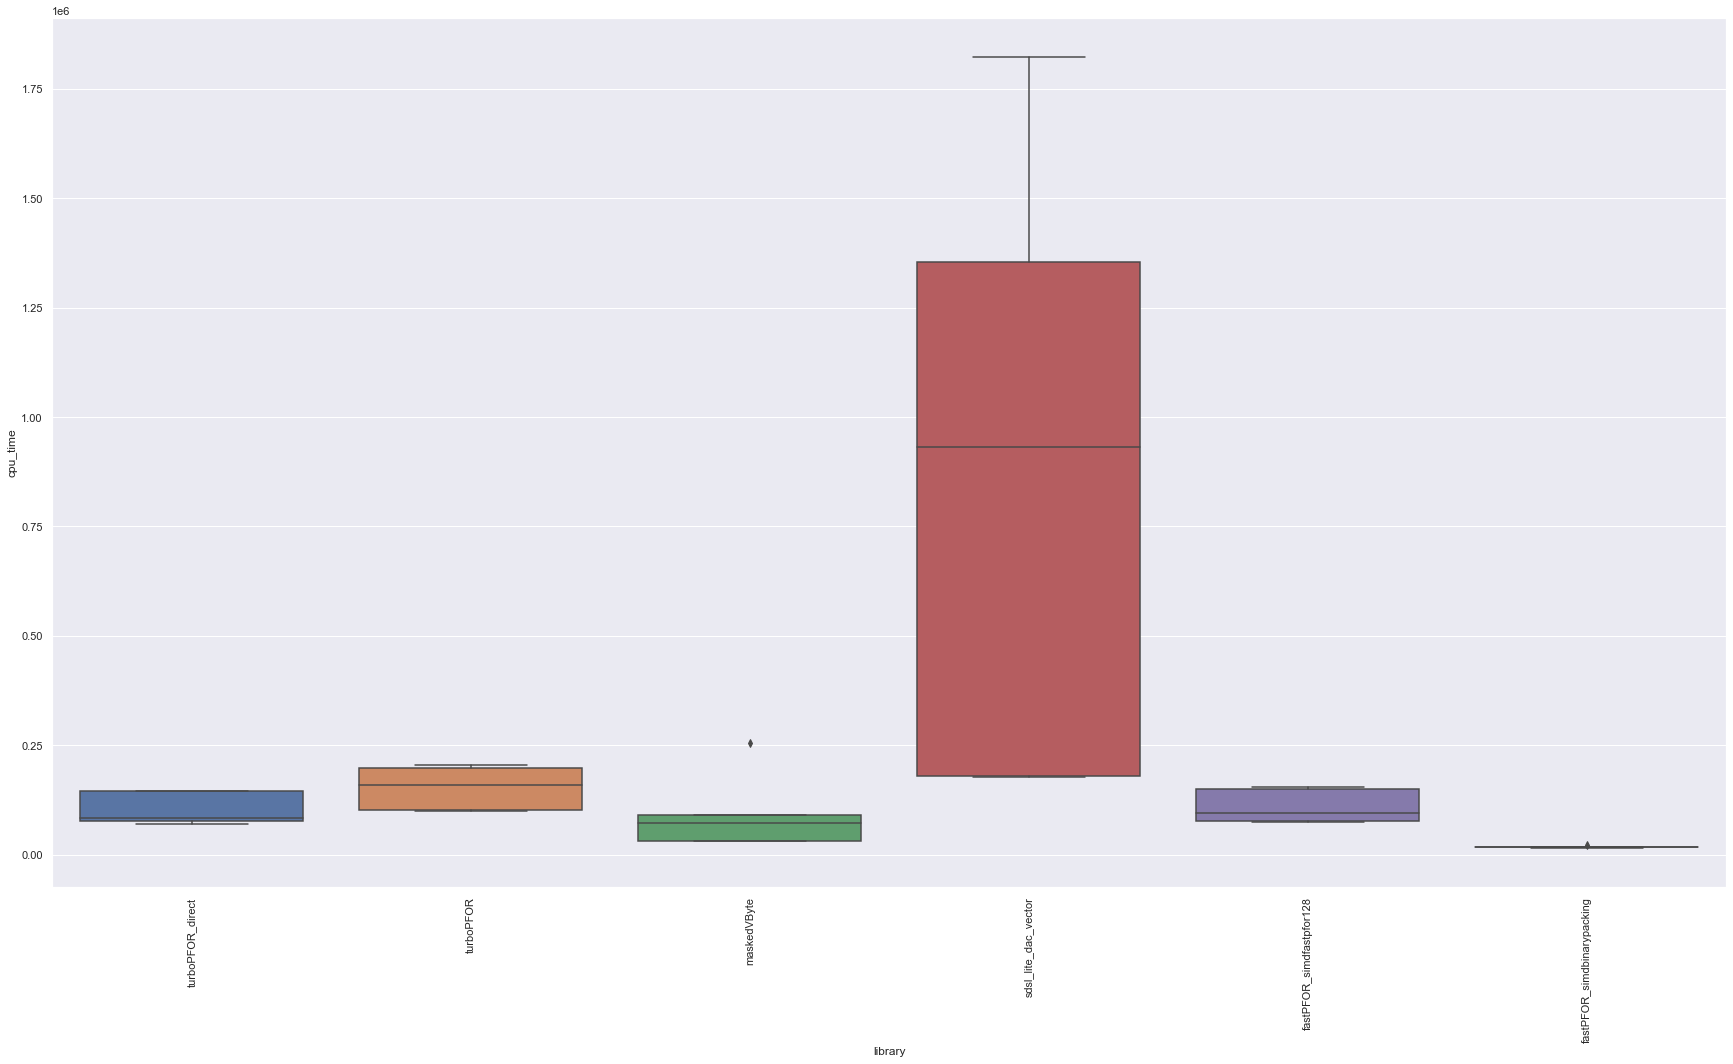

In [277]:
encoding: DataFrame = dataset_filtered.loc[dataset_filtered["process_type"] == "encoding"]
plot: sns.boxplot = sns.boxplot(data=encoding, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("linear")

## Decoding

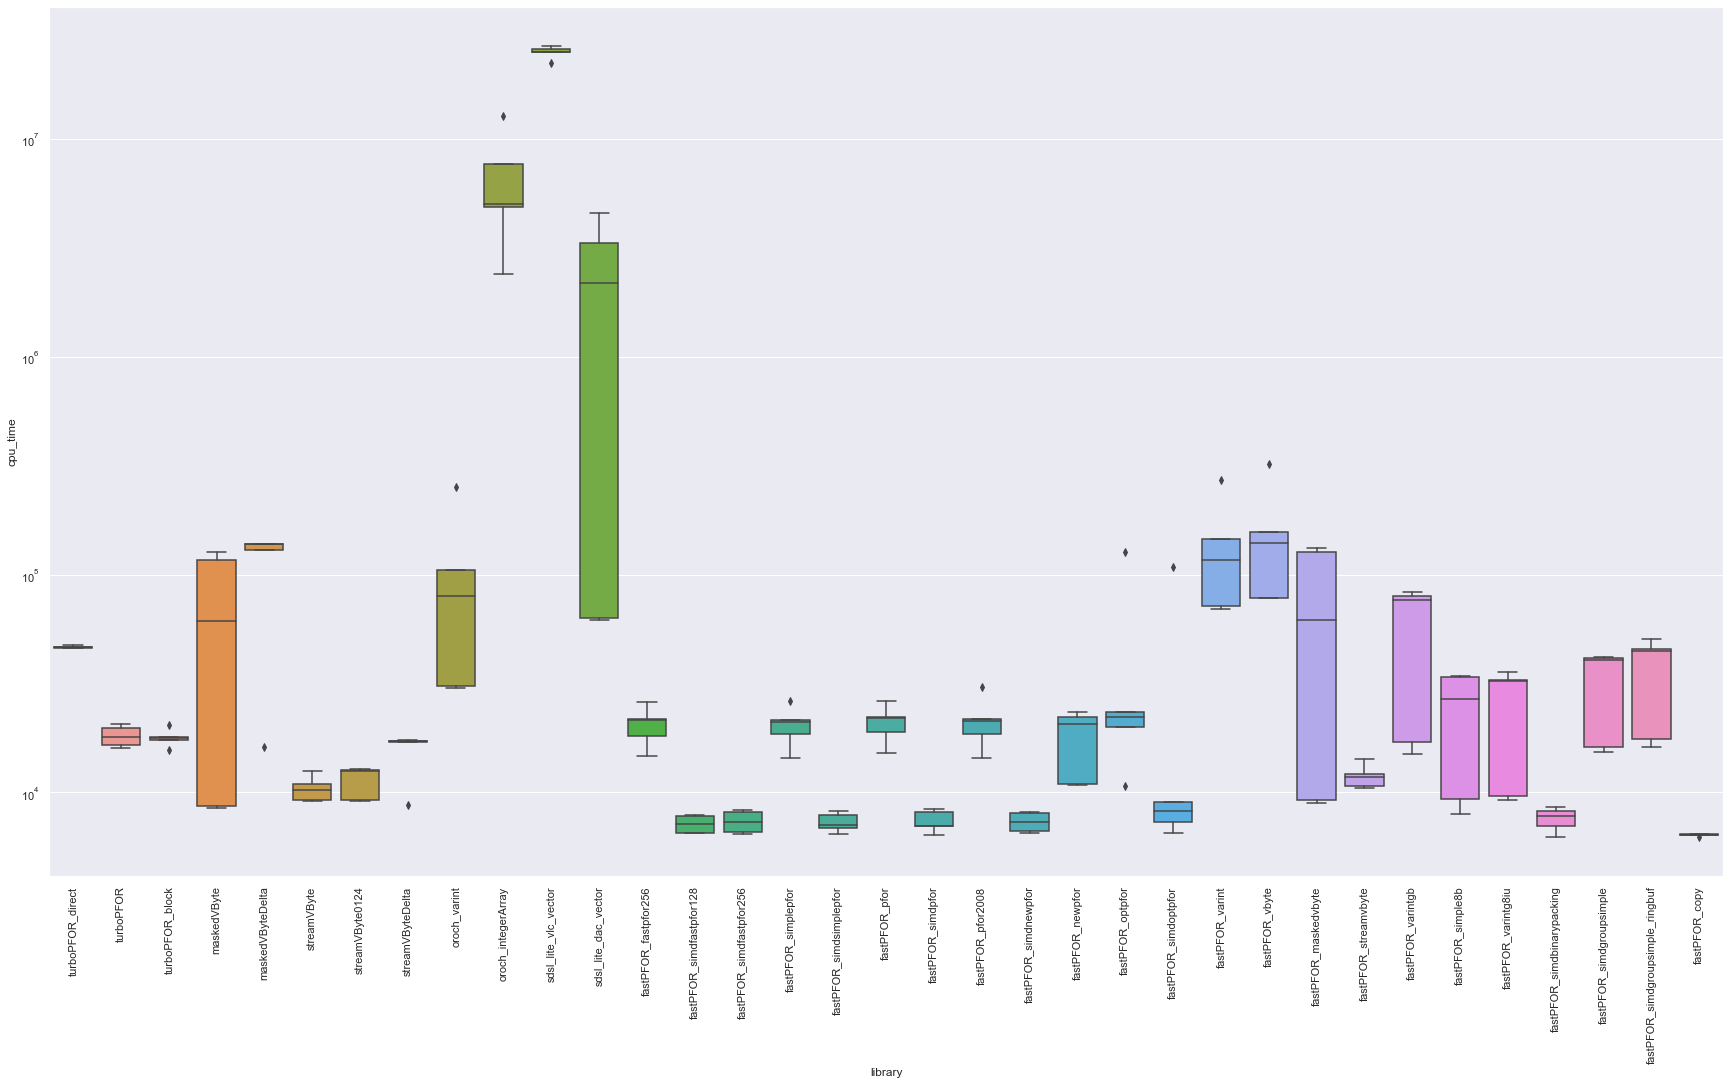

In [278]:
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding"]
plot: sns.boxplot = sns.boxplot(data=decoding, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")

## Decoding (interesting libs)

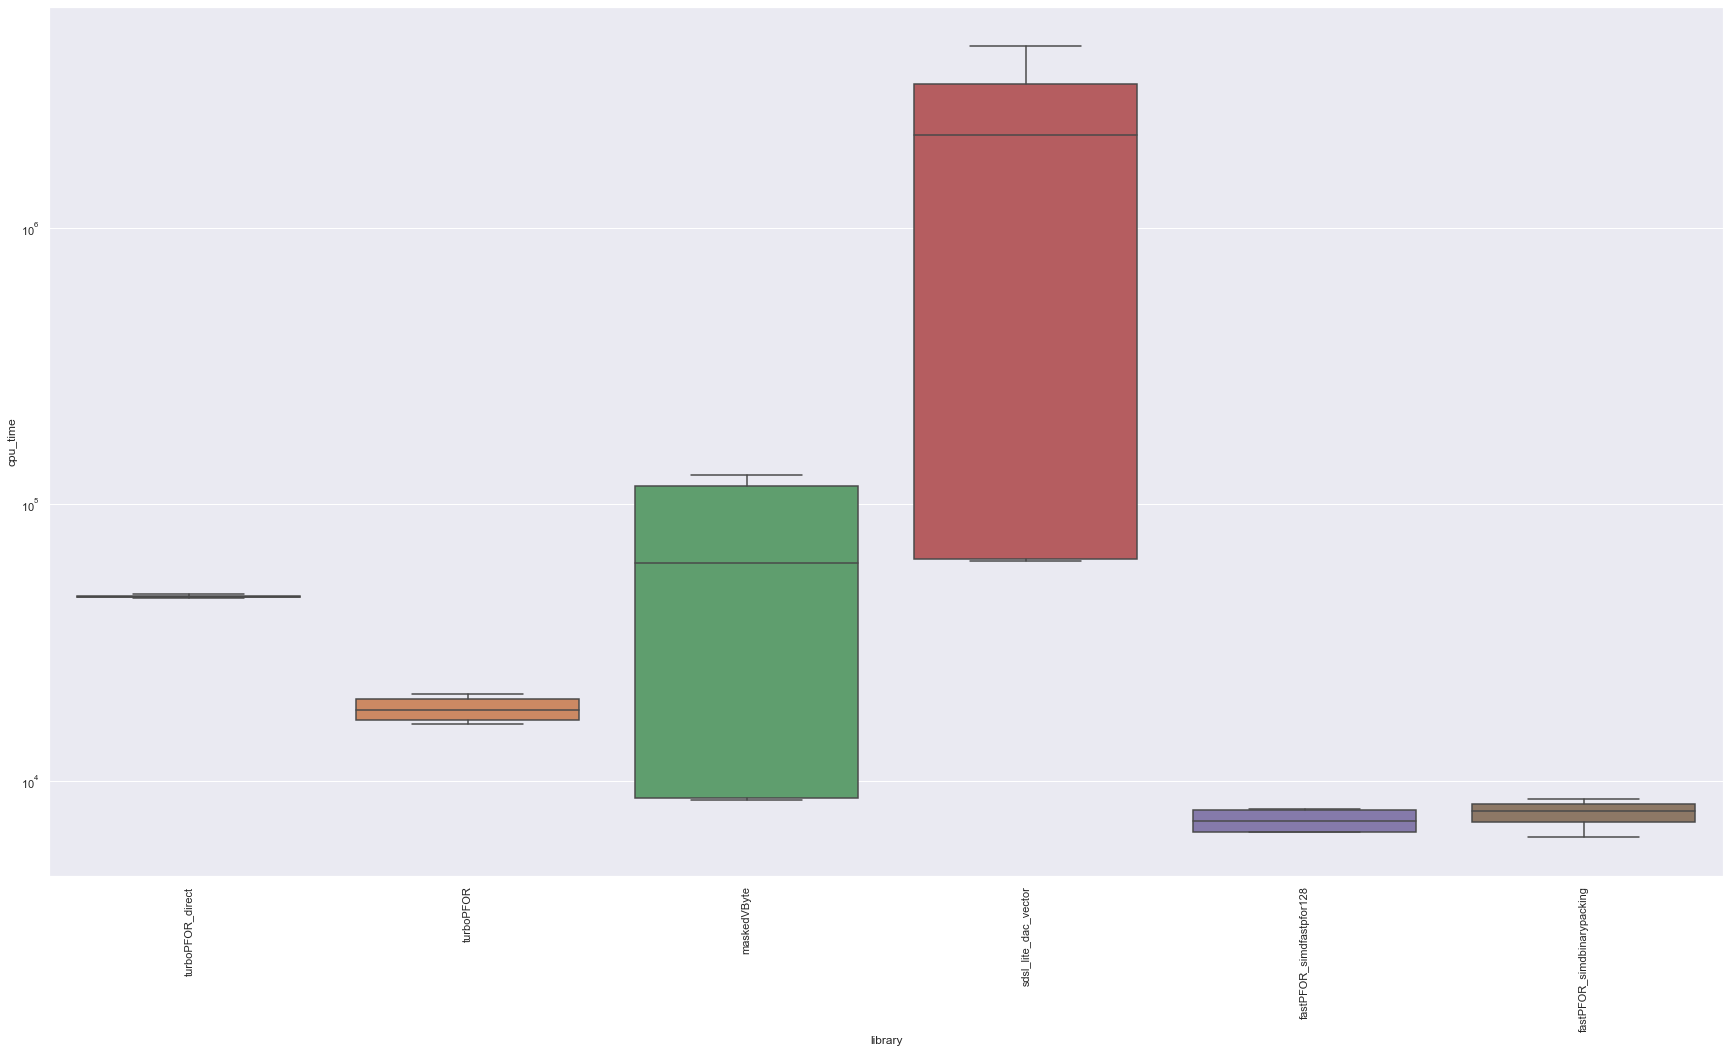

In [279]:
decoding: DataFrame = dataset_filtered.loc[dataset_filtered["process_type"] == "decoding"]
plot: sns.boxplot = sns.boxplot(data=decoding, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")



## Decoding Point Based

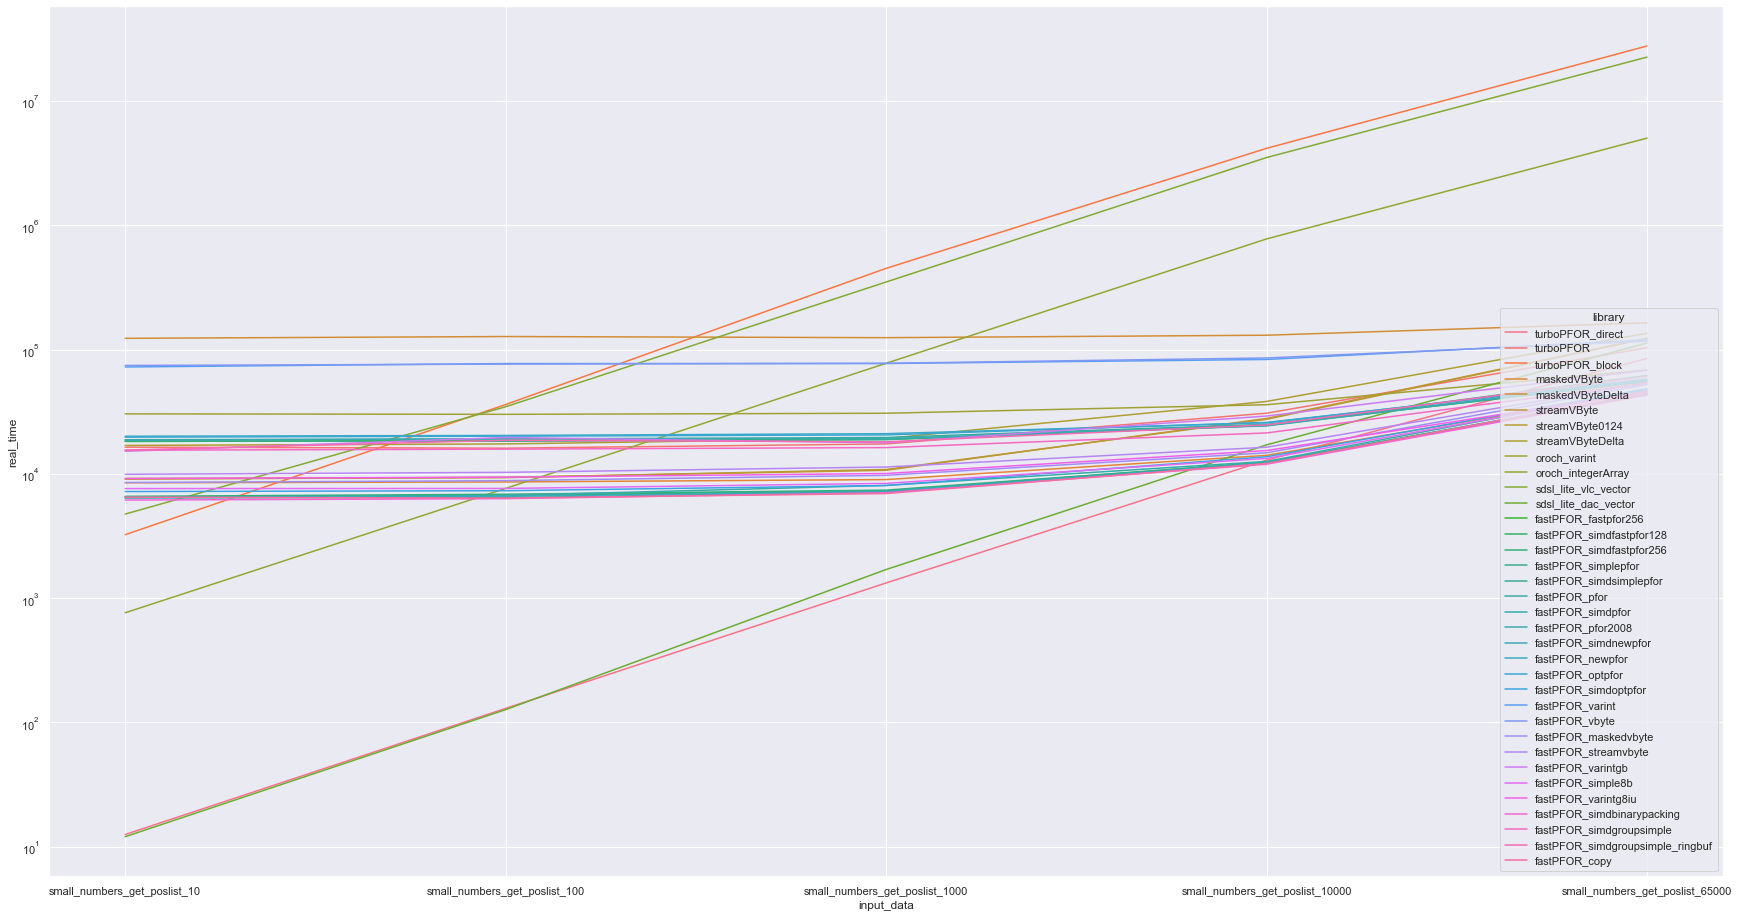

In [280]:
decoding_points: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding_points"]
plot: sns.lineplot = sns.lineplot(data=decoding_points, x="input_data", y="real_time", hue="library")
plot.set_yscale("log")

## Decoding Point Based (interesting libs)

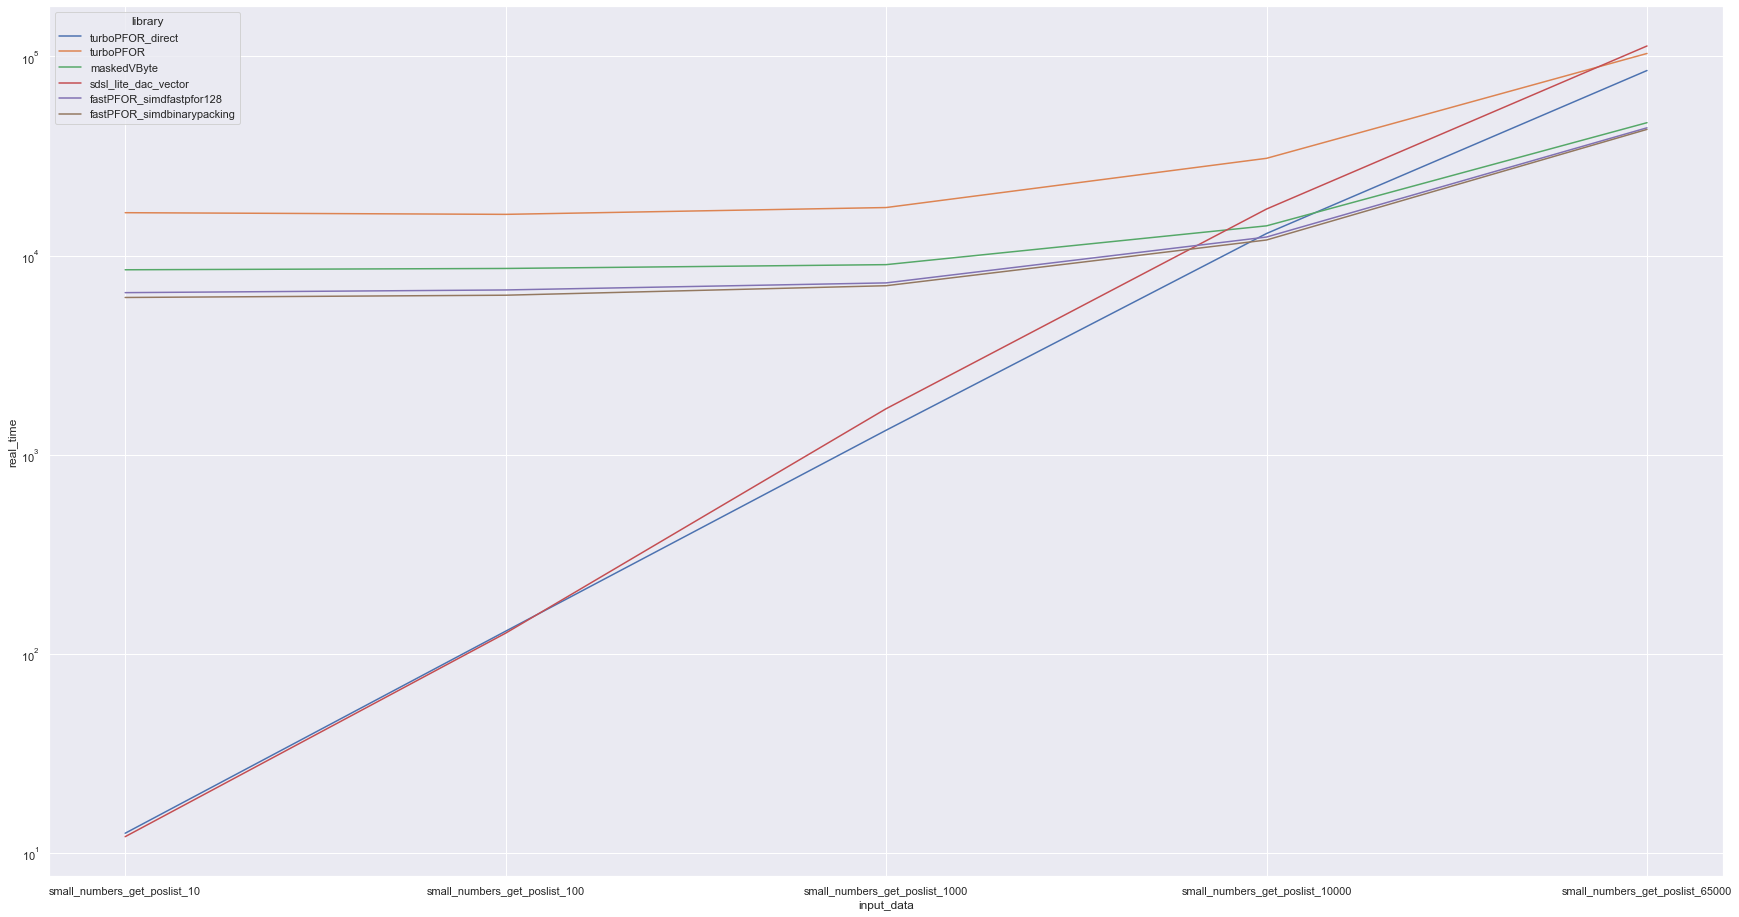

In [281]:
decoding_points: DataFrame = dataset_filtered.loc[dataset_filtered["process_type"] == "decoding_points"]
plot: sns.lineplot = sns.lineplot(data=decoding_points, x="input_data", y="real_time", hue="library")
plot.set_yscale("log")


## Compression

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

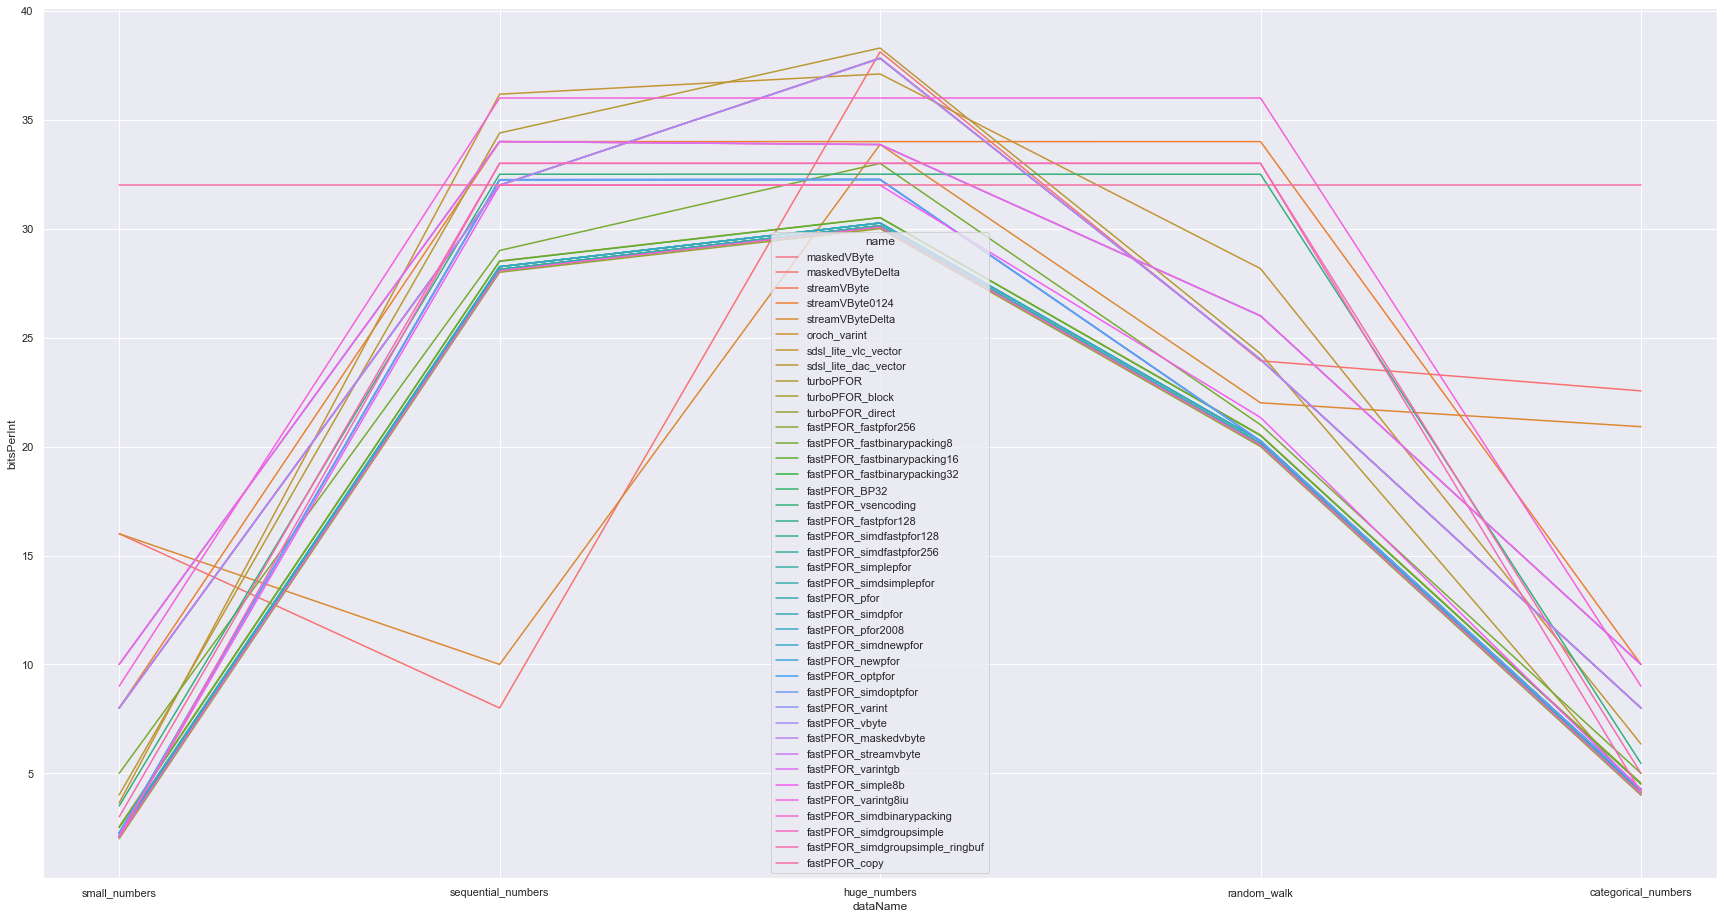

In [282]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

## Compression (interesting libs)

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

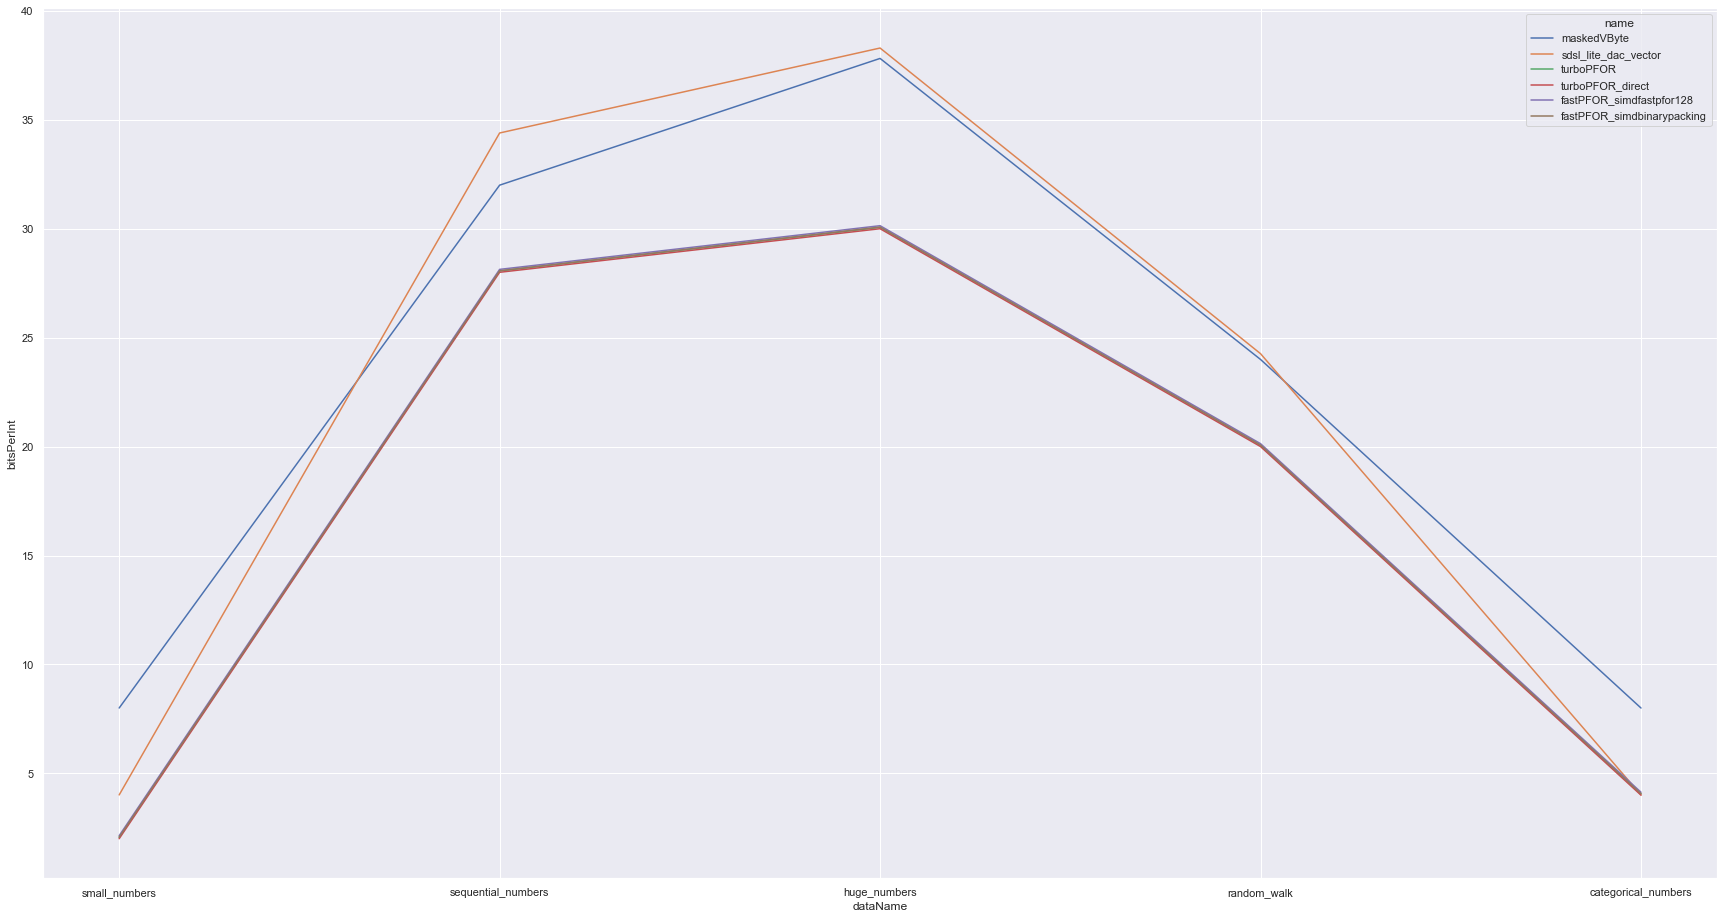

In [283]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats_filtered = compression_stats.loc[compression_stats["name"].isin(dataset_filtered["library"])]
sns.lineplot(data=compression_stats_filtered, x="dataName", y="bitsPerInt", hue="name")

## Pareto

In [284]:
compression_stats["library"] = compression_stats["name"]
combined = benchmark_speeds.merge(compression_stats, left_on=["library", "input_data"], right_on=["library", "dataName"], how="inner")
combined = combined.loc[~(combined["process_type"] == "encoding")] # we don't really care about encoding times (todo: proper weighting)

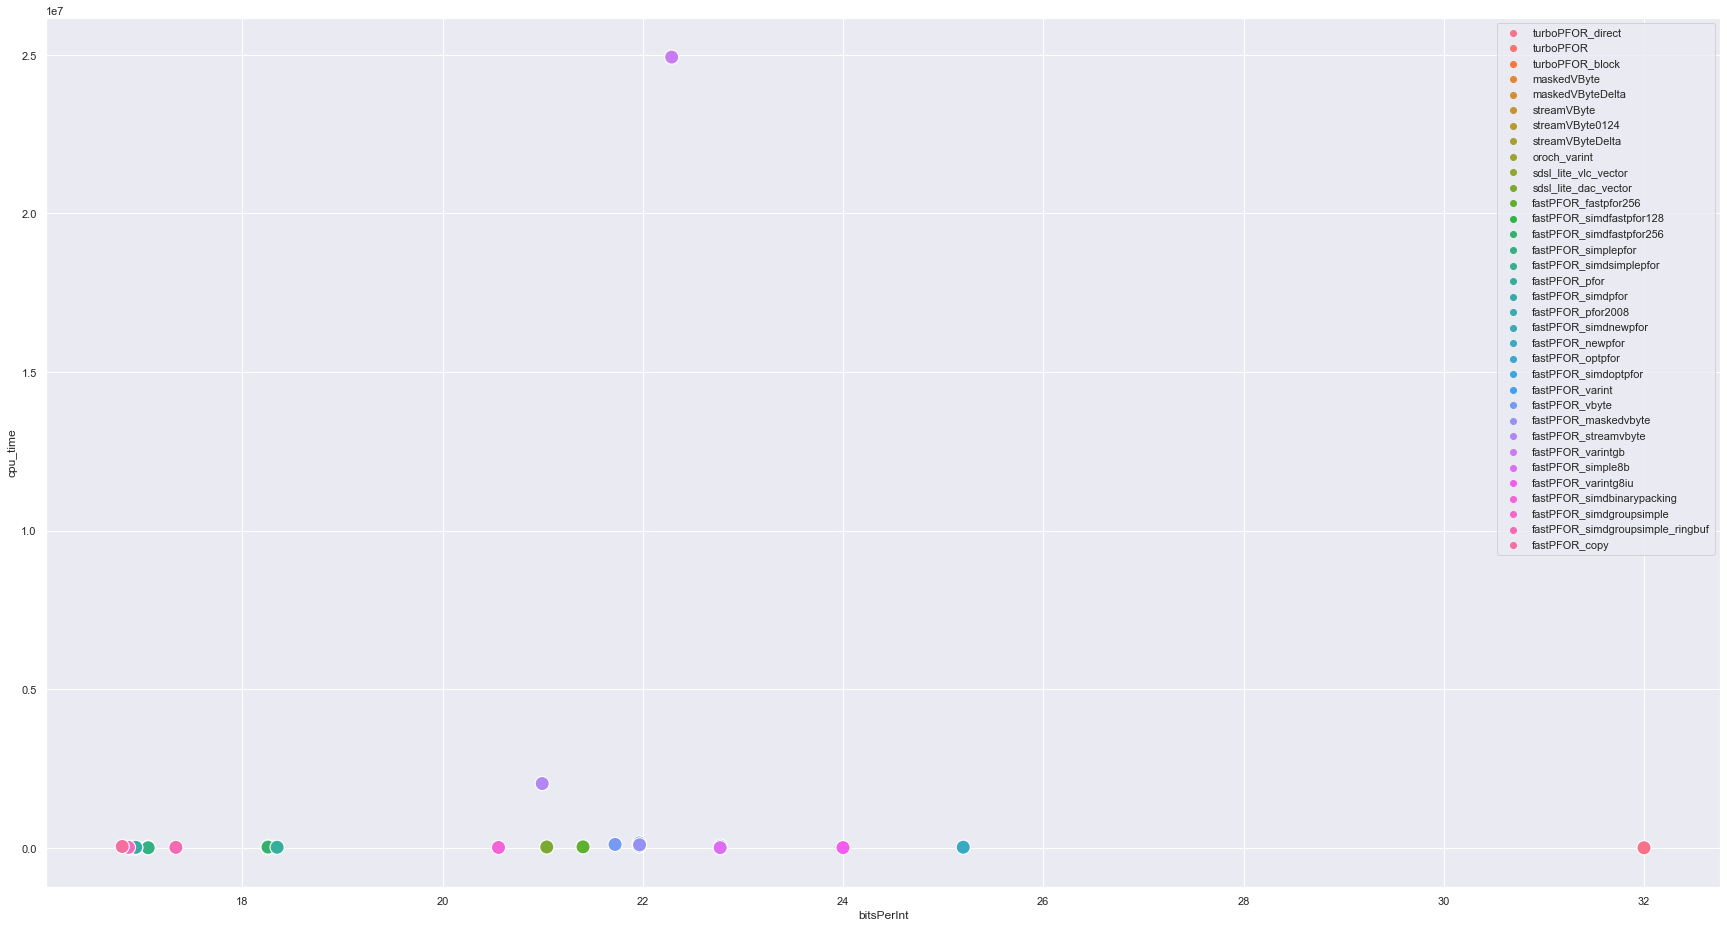

In [285]:
x = combined.groupby("library")['bitsPerInt'].mean()
y = combined.groupby("library")['cpu_time'].mean()
names = combined.library.unique()
plot = sns.scatterplot(x, y, hue=names, s=200)

## Pareto (interesting libs)

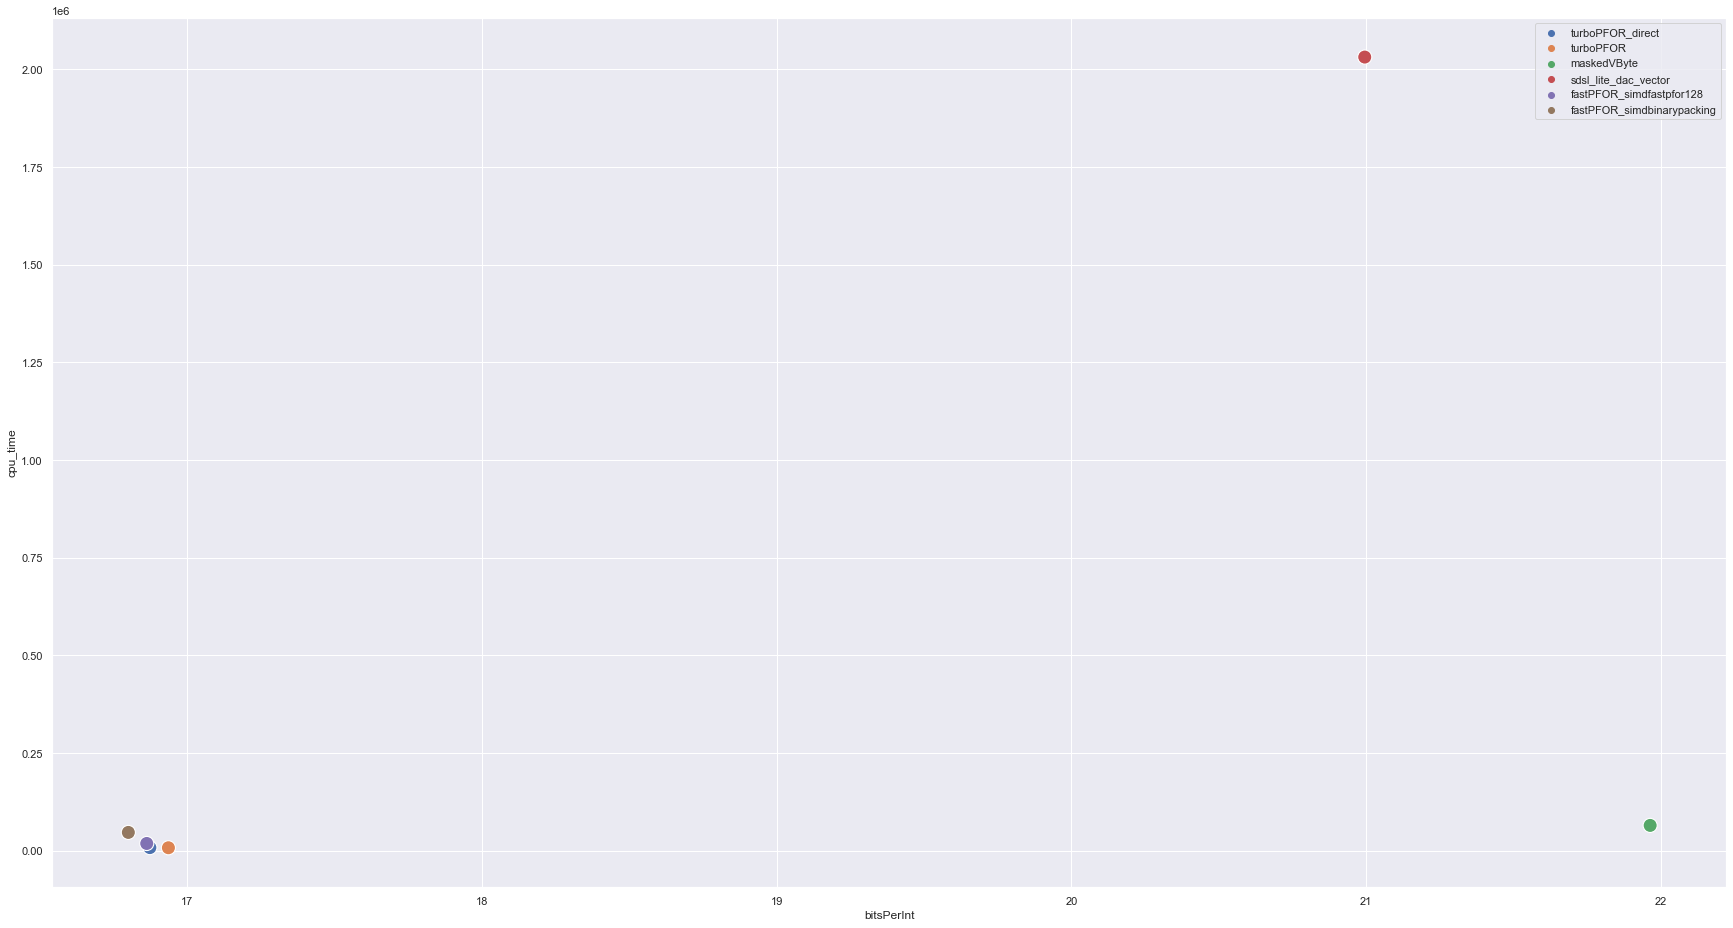

In [286]:
combined_filtered = combined.loc[(combined["library"].isin(most_interesting_libraries))]
x = combined_filtered.groupby("library")['bitsPerInt'].mean()
y = combined_filtered.groupby("library")['cpu_time'].mean()
plot = sns.scatterplot(x, y, hue=combined_filtered.library.unique(), s=200)

## Pareto (even more interesting libs :D)

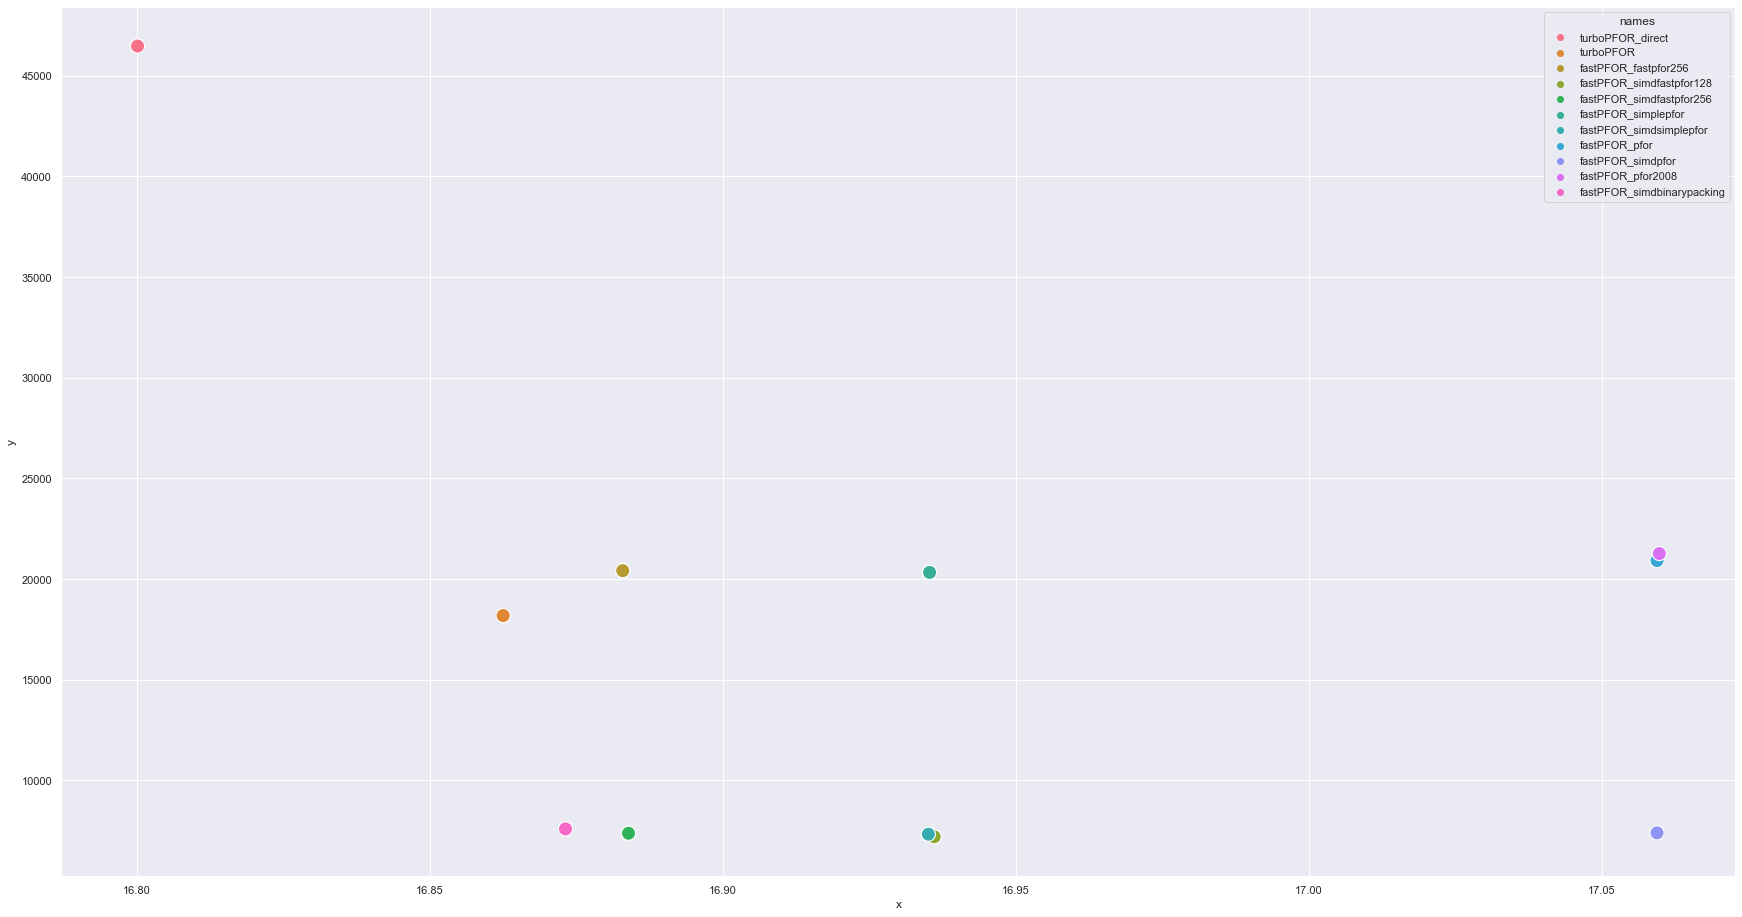

In [287]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"x": x, "y": y, "names": names})
data = data[data.x < 17.2]
plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)